## Import Lib

In [1]:
from source.LBM_1D import LatticeBoltzmann_1D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Finit Difference

In [2]:
#---------------------------------------------------------------
# Finite differences routines
#
def matrix_implicit():
    for i in range(1,N-1):
        A[i,i-1] = - (0.5*C + F)
    for i in range(1,N-1):
        A[i,i] = 1.+2.*F
    for i in range(1,N-1):
        A[i,i+1] = 0.5*C - F
    A[0, 0] = 1.
    A[0, 1] = 0.
    A[N - 1, N - 2] = -1.
    A[N - 1, N - 1] = 1.

def advance_time():
    RHS[:] = PhiE[:]
    RHS[0] = 0.
    RHS[N - 1] = 0.
    PhiE[:] = np.dot(np.linalg.pinv(A), RHS)
#----------------------------------------------------------------
# Number of points
N = 100
#----------------------------------------------------------------
# Initial condition
#
c = np.zeros(N)

# Relaxation time
Tau = 2.0
# Velocity
U = 0.1
# Number of iterations
nt = 100

#-------------------------------------------------
# FD implicit solution -----------------------
PhiE = np.zeros(N)
RHS = np.zeros(N)
A = np.zeros((N, N))

F = (2.*Tau-1)/6.
C = U
matrix_implicit()
for i in range(0,N):
    PhiE[i] = (1+np.tanh((float(i)-float(N)/2.)/2.))/2.

PhiE_init = np.copy(PhiE)

for i in range(1,int(nt)):
    advance_time()


## LBM

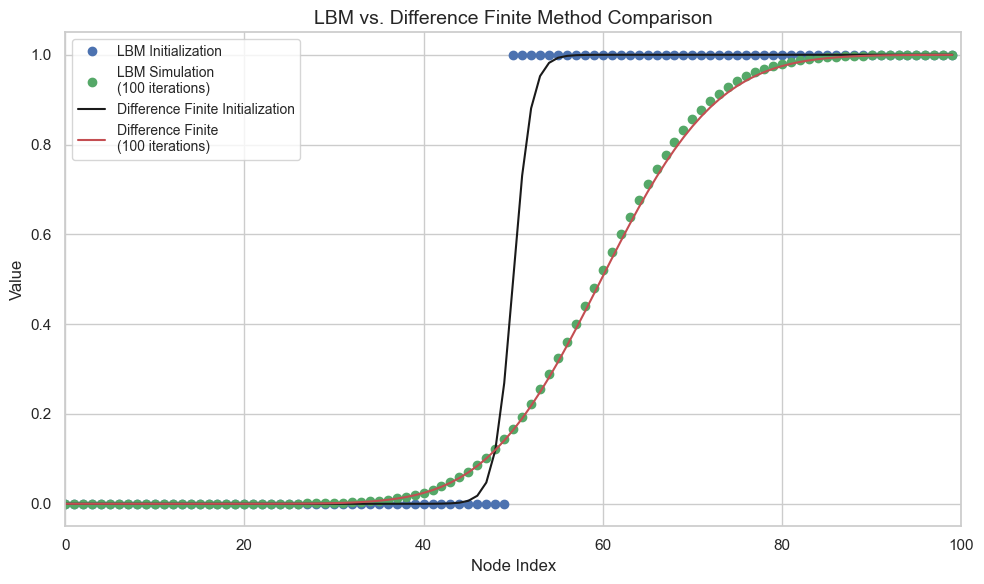

In [3]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Initialize and simulate the LBM
lbm = LatticeBoltzmann_1D(N=100, U=0.1, Tau=2.0, nt=100)
lbm.initialize()

# Plot the LBM initialization
plt.figure(figsize=(10, 6))
plt.plot(lbm.c, "bo", label="LBM Initialization", markersize=6)

# Simulate LBM and add the results
lbm.simulate()
plt.plot(lbm.c, "go", label=f"LBM Simulation \n({lbm.nt} iterations)", markersize=6)

# Add Difference Finite results
plt.plot(PhiE_init, "k-", label="Difference Finite Initialization", linewidth=1.5)
plt.plot(PhiE, "r-", label=f"Difference Finite \n({nt} iterations)", linewidth=1.5)

# Improve legend, axis labels, and title
plt.legend(loc="upper left", fontsize=10, frameon=True)
plt.xlabel("Node Index", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title("LBM vs. Difference Finite Method Comparison", fontsize=14)
plt.xlim(0,N)
# Show the plot
plt.tight_layout()

plt.savefig("./figures/1D_comparaison_LBM_DF.png", dpi=300)

## Convergence

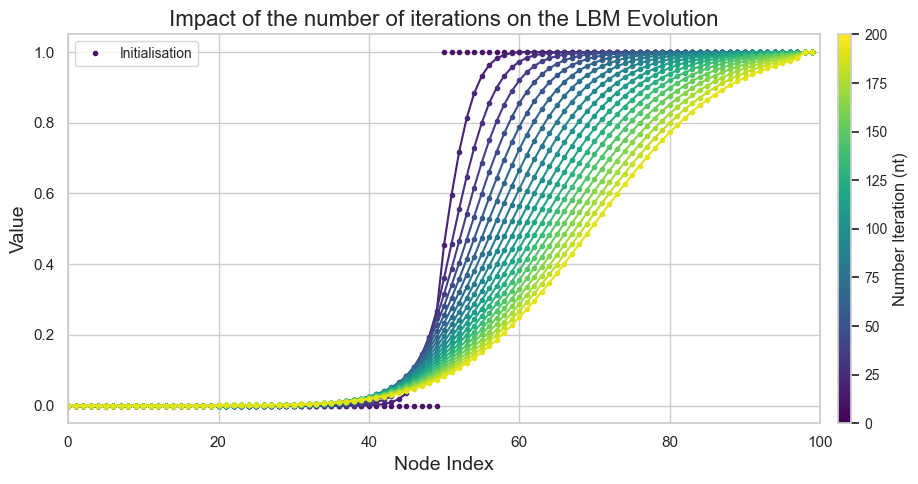

In [4]:
# Parameters for the range of `nt`
nt_values = range(0, 210, 10)  # Extended range of nt
num_nt = len(nt_values)

# Define a colormap and normalize for colorbar
colors = sns.color_palette("viridis", num_nt)
norm = plt.Normalize(min(nt_values), max(nt_values))

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Loop through different time steps
for i, nt in enumerate(nt_values):
    lbm = LatticeBoltzmann_1D(N=100, U=0.1, Tau=2.0, nt=nt)
    lbm.simulate()
    label = None
    if i == 0:
        label = f"Initialisation"
        ax.plot(lbm.c, ".", label=label, color=colors[i], linewidth=1.5)
    else:
        ax.plot(lbm.c, ".-", color=colors[i], linewidth=1.5)

# Add axis labels and title
ax.set_xlabel("Node Index", fontsize=14)
ax.set_ylabel("Value", fontsize=14)
ax.set_title("Impact of the number of iterations on the LBM Evolution", fontsize=16)
ax.set_xlim(0, lbm.N)

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Set an empty array as we don't need data values directly
cbar = fig.colorbar(sm, ax=ax, aspect=30, pad=0.02)
cbar.set_label("Number Iteration (nt)", fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Improve legend and layout
ax.legend(fontsize=10, loc="upper left", frameon=True)
plt.tight_layout()

plt.savefig("./figures/1D_impact_iteration.png", dpi=300)